<a href="https://colab.research.google.com/github/Ebasurtos/Estadistica-y-probabilidad/blob/main/BASURTO_SIUCE%2C_Eder_Tarea1_Data_Discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TAREA 1 **

**Alumno:**

*  Eder Basurto



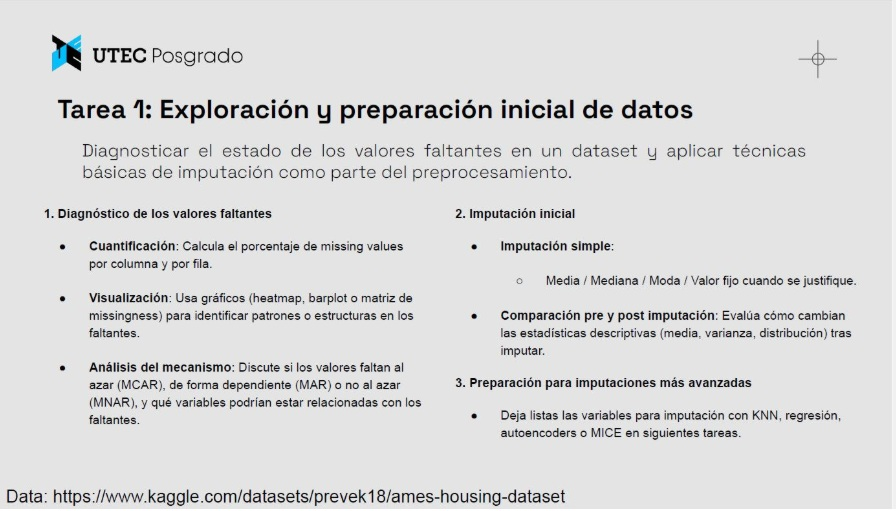

In [17]:
from IPython.display import Image
Image('tarea.jpg')

**1. Diagnóstico de los valores faltantes**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('AmesHousing.csv')

# Exploración inicial
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:")
print(df.head())

Dimensiones del dataset: (2930, 82)

Primeras filas:
   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr



*  **Cuantificación: Calcule el porcentaje de missing values por columna y por fila**
*   **Visualización: Usa gráficos (Heatmap, barplot o matriz de missingness) para identificar patrones o estructuras en los  faltantes**


Porcentaje de valores faltantes por columna:
Pool QC           99.556314
Misc Feature      96.382253
Alley             93.242321
Fence             80.477816
Mas Vnr Type      60.580205
Fireplace Qu      48.532423
Lot Frontage      16.723549
Garage Qual        5.426621
Garage Cond        5.426621
Garage Yr Blt      5.426621
Garage Finish      5.426621
Garage Type        5.358362
Bsmt Exposure      2.832765
BsmtFin Type 2     2.764505
Bsmt Cond          2.730375
Bsmt Qual          2.730375
BsmtFin Type 1     2.730375
Mas Vnr Area       0.784983
Bsmt Full Bath     0.068259
Bsmt Half Bath     0.068259
BsmtFin SF 1       0.034130
BsmtFin SF 2       0.034130
Electrical         0.034130
Total Bsmt SF      0.034130
Bsmt Unf SF        0.034130
Garage Area        0.034130
Garage Cars        0.034130
dtype: float64


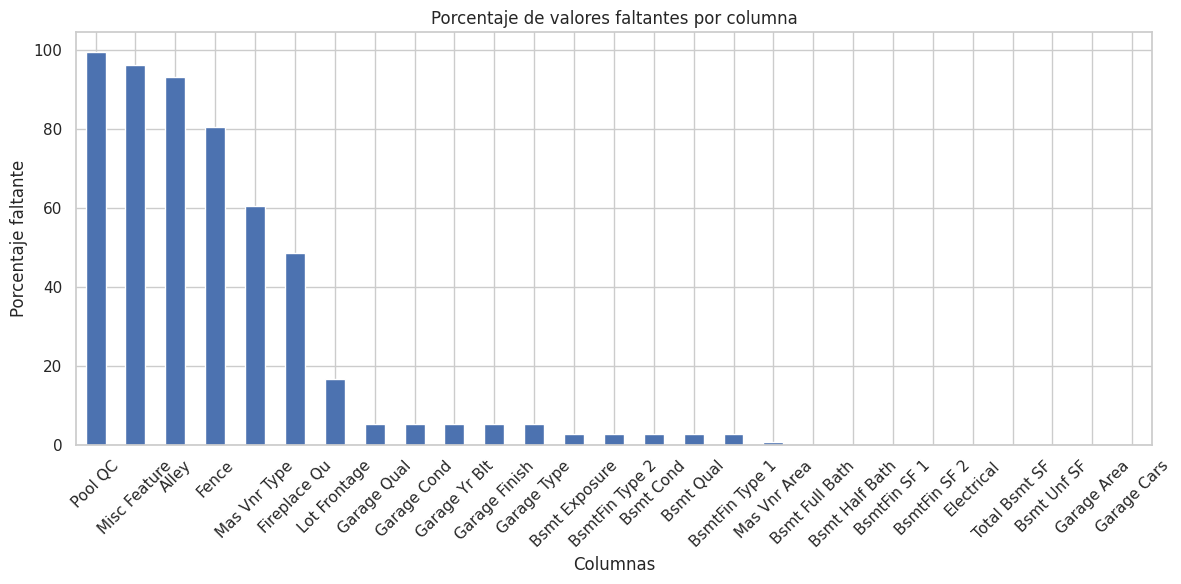

In [9]:
# Calcular porcentaje de valores faltantes por columna
missing_col = df.isnull().mean() * 100
missing_col = missing_col[missing_col > 0].sort_values(ascending=False)

print("Porcentaje de valores faltantes por columna:")
print(missing_col)

# Visualización
plt.figure(figsize=(12, 6))
missing_col.plot(kind='bar')
plt.title('Porcentaje de valores faltantes por columna')
plt.ylabel('Porcentaje faltante')
plt.xlabel('Columnas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Resumen estadístico de valores faltantes por fila:
count    2930.000000
mean        6.554982
std         2.275848
min         1.219512
25%         4.878049
50%         6.097561
75%         7.317073
max        20.731707
dtype: float64


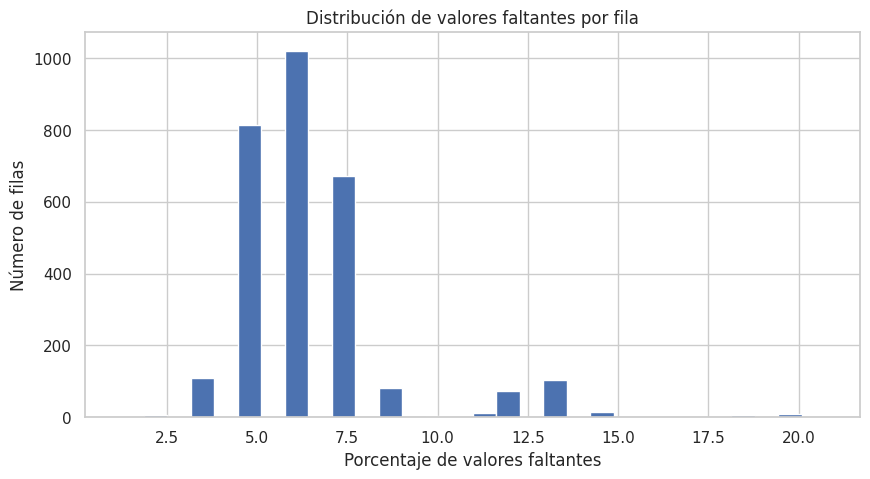

In [10]:
# Calcular porcentaje de valores faltantes por fila
missing_row = df.isnull().mean(axis=1) * 100

print("\nResumen estadístico de valores faltantes por fila:")
print(missing_row.describe())

# Visualización
plt.figure(figsize=(10, 5))
plt.hist(missing_row, bins=30)
plt.title('Distribución de valores faltantes por fila')
plt.xlabel('Porcentaje de valores faltantes')
plt.ylabel('Número de filas')
plt.show()

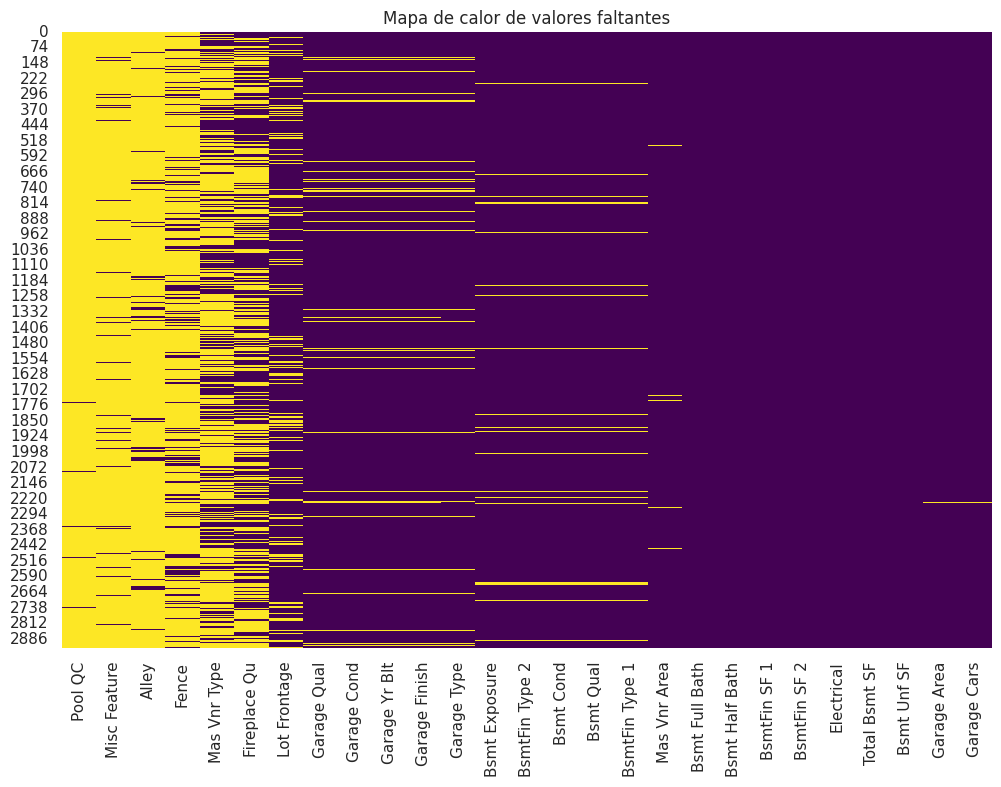

In [11]:
# Crear matriz de missingness para columnas con algún valor faltante
cols_with_missing = missing_col.index.tolist()
missing_matrix = df[cols_with_missing].isnull()

plt.figure(figsize=(12, 8))
sns.heatmap(missing_matrix, cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores faltantes')
plt.show()

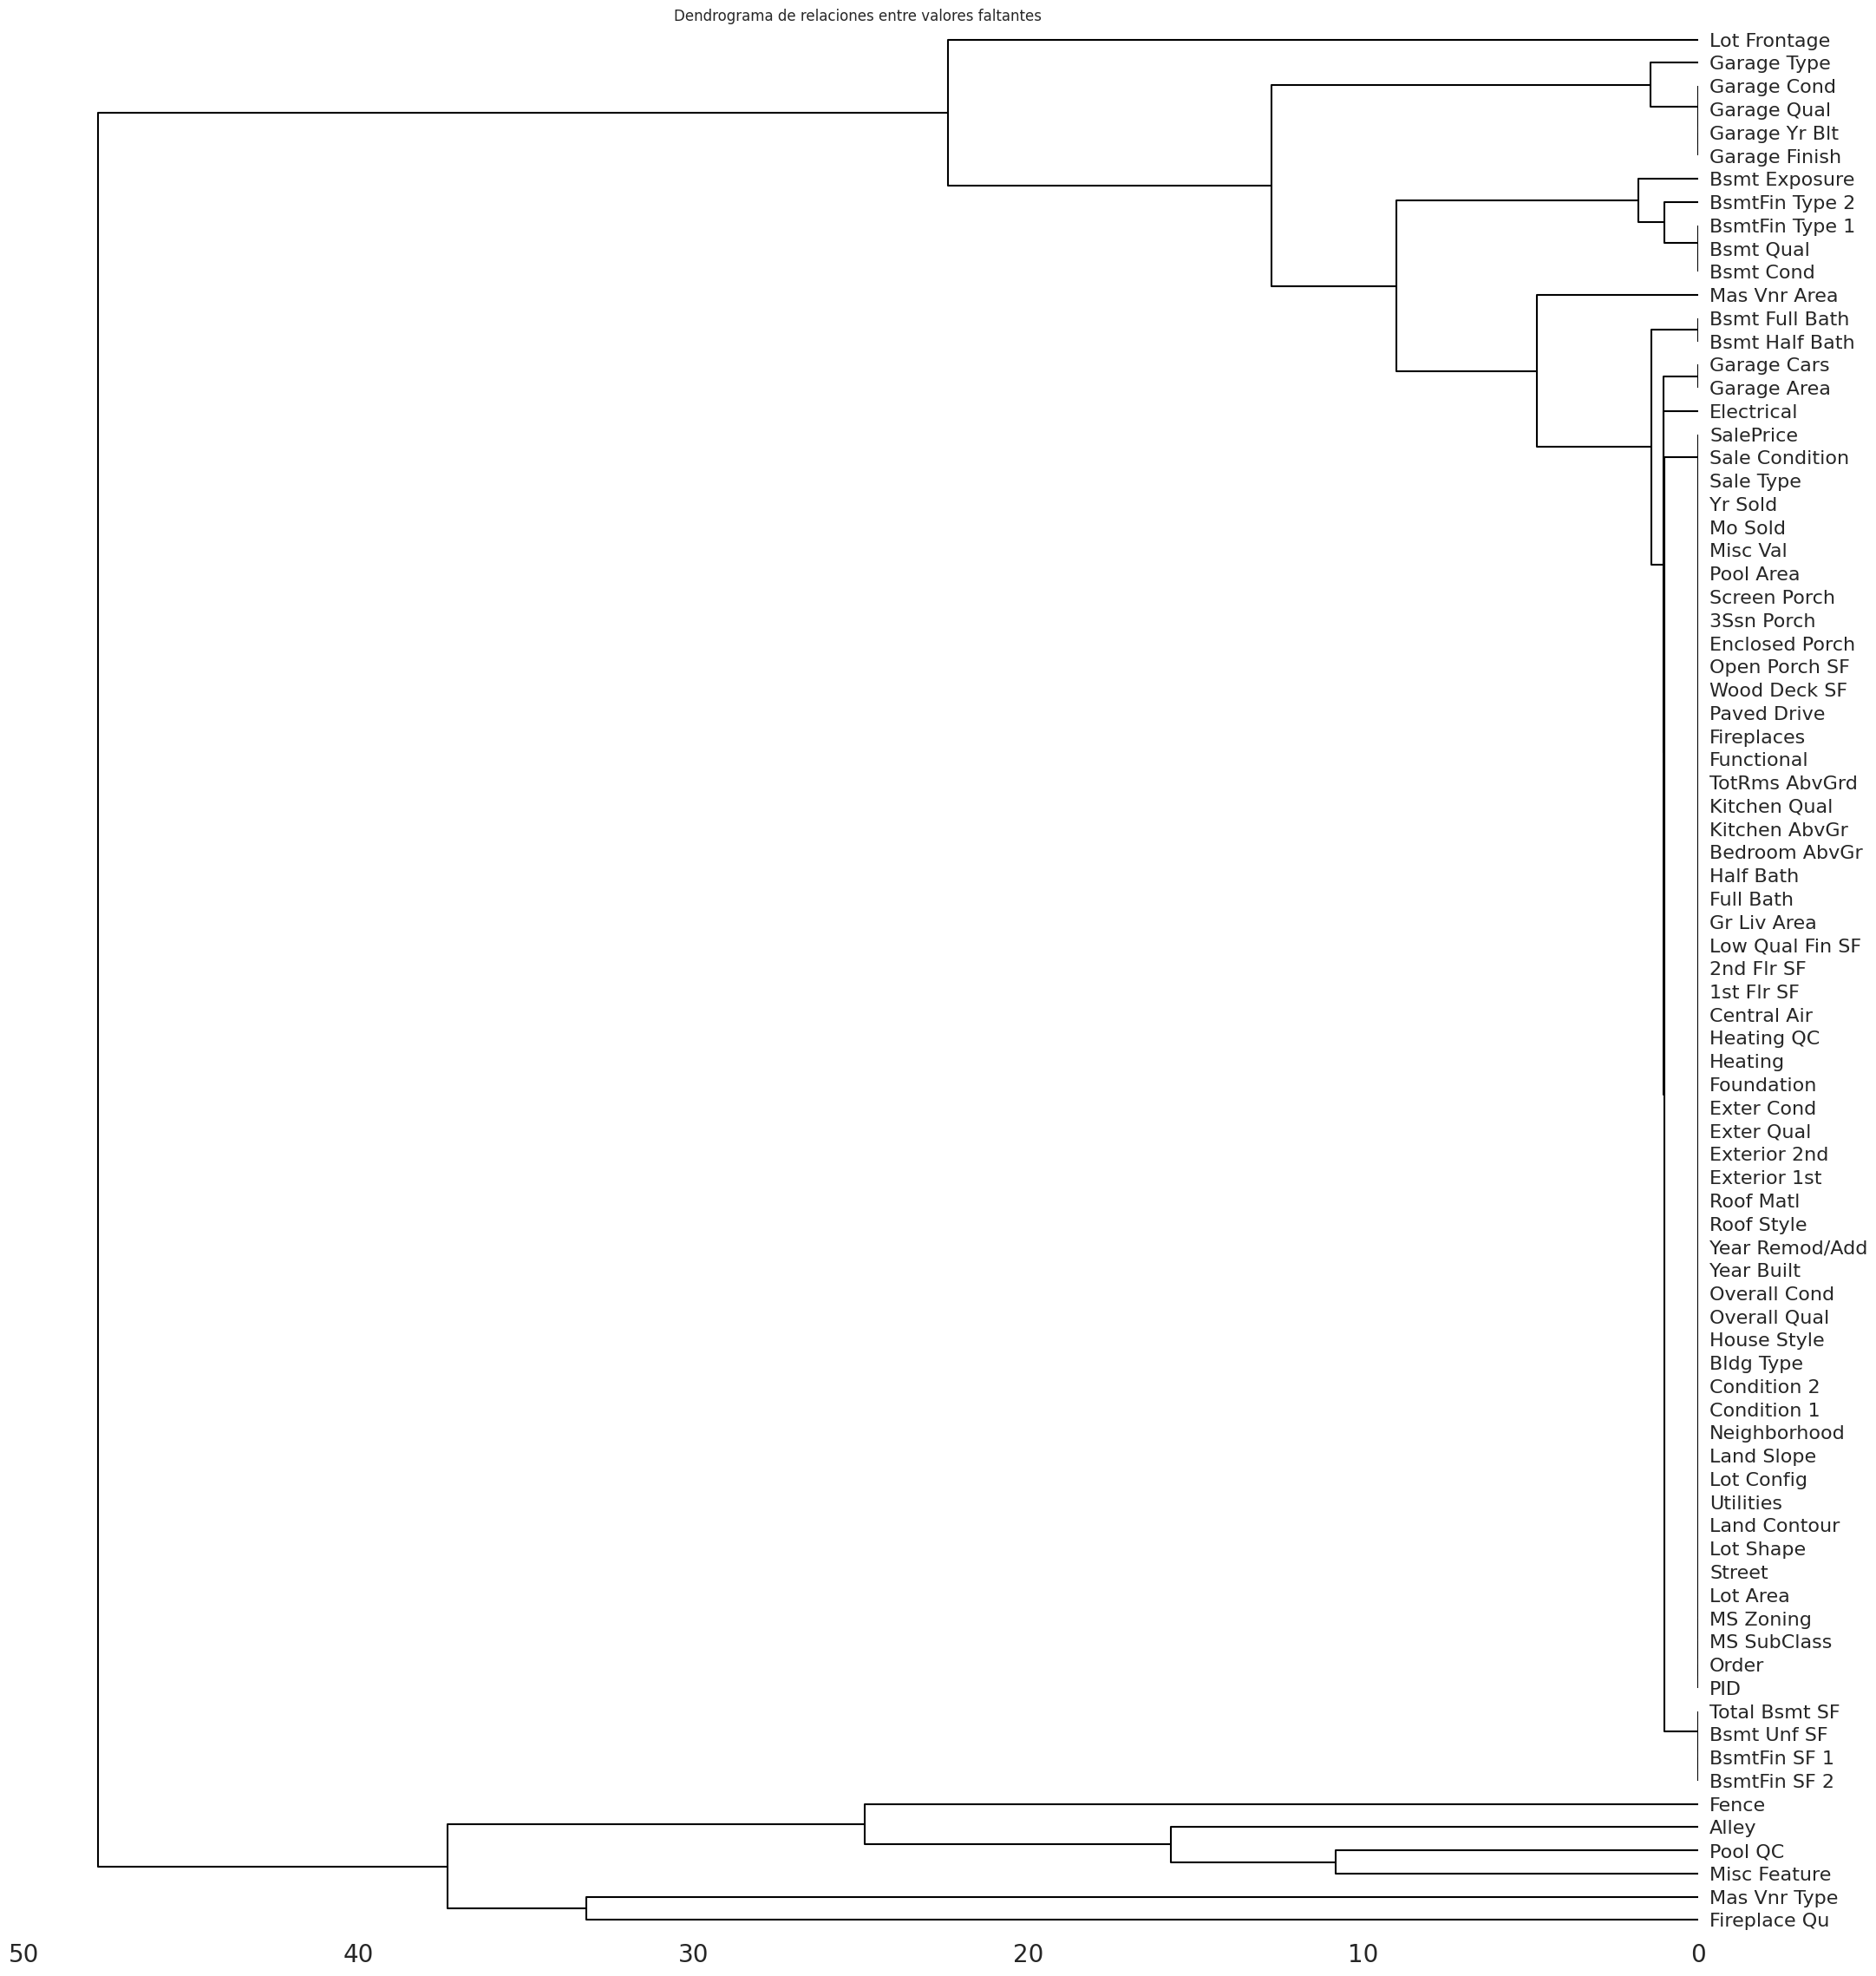

In [12]:
import missingno as msno

msno.dendrogram(df)
plt.title('Dendrograma de relaciones entre valores faltantes')
plt.show()

In [13]:
# Analisis de relaciones entre variables clave con missing values
garage_vars = ['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond']
bsmt_vars = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1']

print("\nRelación entre variables de garaje:")
print(df[garage_vars].isnull().mean())

print("\nRelación entre variables de sótano:")
print(df[bsmt_vars].isnull().mean())

# Evaluacion si las mismas filas tienen missing values en estas variables
print("\nFilas con missing values en todas las variables de garaje:",
      df[garage_vars].isnull().all(axis=1).sum())
print("Filas con missing values en todas las variables de sótano:",
      df[bsmt_vars].isnull().all(axis=1).sum())


Relación entre variables de garaje:
Garage Type      0.053584
Garage Yr Blt    0.054266
Garage Finish    0.054266
Garage Qual      0.054266
Garage Cond      0.054266
dtype: float64

Relación entre variables de sótano:
Bsmt Qual         0.027304
Bsmt Cond         0.027304
Bsmt Exposure     0.028328
BsmtFin Type 1    0.027304
BsmtFin SF 1      0.000341
dtype: float64

Filas con missing values en todas las variables de garaje: 157
Filas con missing values en todas las variables de sótano: 1


In [14]:
# Ejemplo: Relación entre 'Pool QC' faltante y 'Pool Area' = 0
print("\nRelación entre Pool QC faltante y Pool Area:")
print(df[df['Pool QC'].isnull()]['Pool Area'].value_counts())

# Ejemplo: Relación entre 'Alley' faltante y tipo de propiedad
print("\nRelación entre Alley faltante y MS Zoning:")
print(df[df['Alley'].isnull()]['MS Zoning'].value_counts())


Relación entre Pool QC faltante y Pool Area:
Pool Area
0    2917
Name: count, dtype: int64

Relación entre Alley faltante y MS Zoning:
MS Zoning
RL         2233
RM          363
FV           87
RH           23
C (all)      22
I (all)       2
A (agr)       2
Name: count, dtype: int64


**Interpretación del diagnóstico:**


*   Cuantificación:

La mayoría de las filas tienen 0 o pocos valores faltantes, pero algunas tienen varios.

*   Visualización:

El heatmap muestra que ciertas columnas tienen patrones sistemáticos de valores faltantes.

*   Mecanismo de faltantes:

_ MCAR (Missing Completely At Random): Algunos valores como "Lot Frontage" podrían faltar al azar.

_ MAR (Missing At Random): "Alley" probablemente falta porque la propiedad no tiene callejón (el valor "NA" significa que no aplica).

_ MNAR (Missing Not At Random): "Pool QC" falta probablemente porque no hay piscina, lo que podría estar relacionado con el precio.



**2.	Imputación inicial**

*   **Imputación simple: Media, Mediana, Moda, Valor fijo cuando se justifique**
*   **Comparación pre y post imputación: Evalúa como cambian las estadísticas descriptivas (Media, varianza, distribución) tras imputar**



/tmp/ipython-input-15-2003696793.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-15-2003696793.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=


Comparación para Lot Frontage:
Original - Media: 69.22459016393442 Mediana: 68.0 Desviación estándar: 23.36533497450349
Imputado - Media: 70.0079946892052 Mediana: 69.0699764721108 Desviación estándar: 23.305669099007837


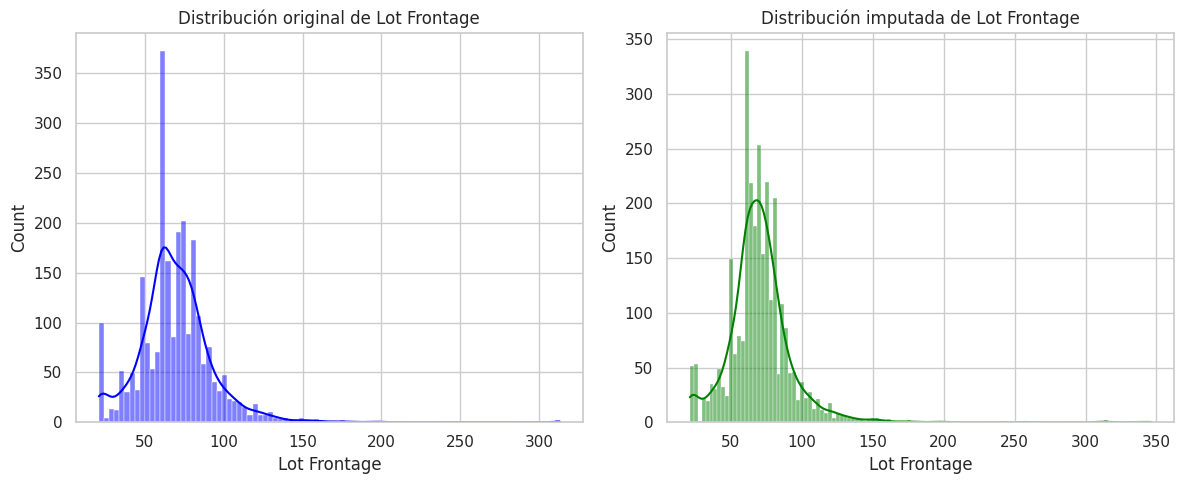


Comparación para Mas Vnr Area:
Original - Media: 101.8968008255934 Mediana: 0.0 Desviación estándar: 179.11261057727816
Imputado - Media: 101.09692832764505 Mediana: 0.0 Desviación estándar: 178.63454482575858


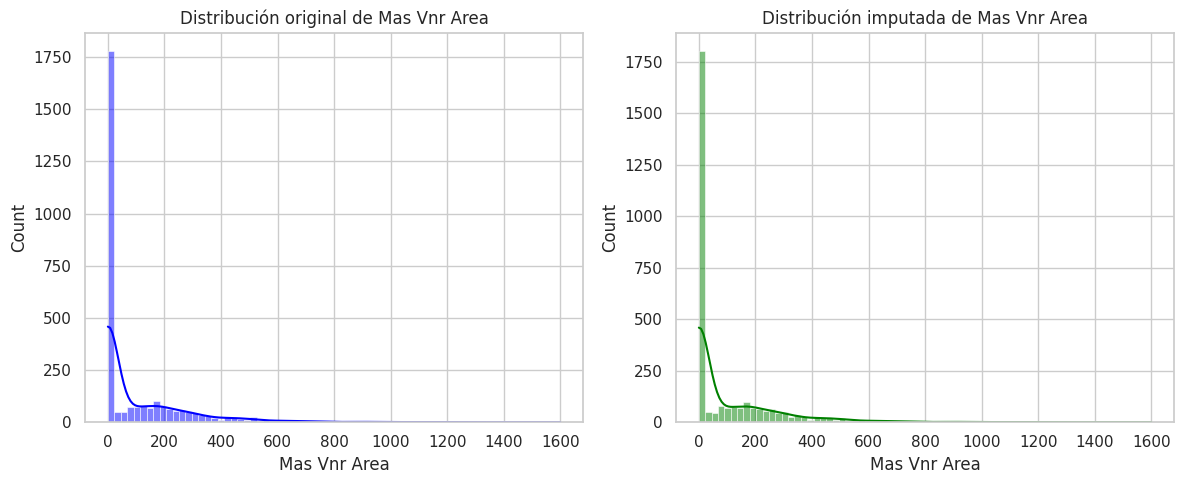


Comparación para Garage Yr Blt:
Original - Media: 1978.1324431613136 Mediana: 1979.0 Desviación estándar: 25.52841125092426
Imputado - Media: 1978.1795221843004 Mediana: 1979.0 Desviación estándar: 24.826620170263656


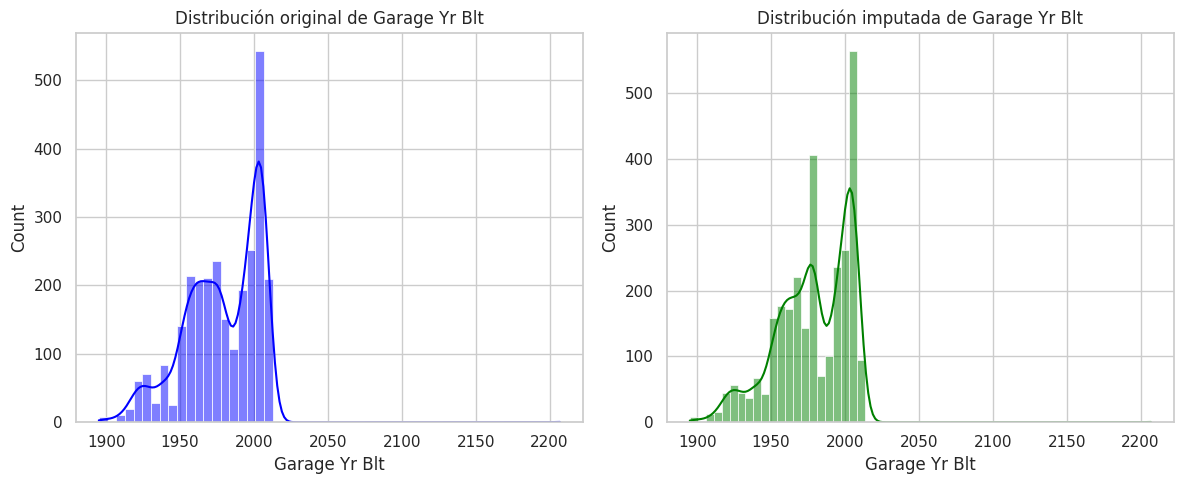


Valores faltantes después de imputación: 0


In [15]:
# Copia del dataframe para imputación
df_imputed = df.copy()

# a) Imputación simple
# Para variables numéricas: media o mediana
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df[col].isnull().any():
        if col == 'Lot Frontage':
            # Imputar basado en relación con Lot Area (regresión lineal simple)
            from sklearn.linear_model import LinearRegression
            lr = LinearRegression()
            temp_df = df[['Lot Frontage', 'Lot Area']].dropna()
            lr.fit(temp_df[['Lot Area']], temp_df['Lot Frontage'])
            missing_idx = df[col].isnull()
            df_imputed.loc[missing_idx, col] = lr.predict(df.loc[missing_idx, ['Lot Area']])
        else:
            # Imputar con mediana (menos sensible a outliers)
            df_imputed[col].fillna(df[col].median(), inplace=True)

# Para variables categóricas: moda o categoría especial
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().any():
        # Para algunas variables, NA es una categoría válida (como "No alley")
        if col in ['Alley', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
                  'BsmtFin Type 1', 'BsmtFin Type 2', 'Fireplace Qu',
                  'Garage Type', 'Garage Finish', 'Garage Qual',
                  'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']:
            df_imputed[col].fillna('None', inplace=True)
        else:
            # Imputar con la moda
            df_imputed[col].fillna(df[col].mode()[0], inplace=True)

# b) Comparación pre y post imputación
# Función para mostrar estadísticas antes y después
def compare_stats(original, imputed, col):
    print(f"\nComparación para {col}:")
    print("Original - Media:", original[col].mean(),
          "Mediana:", original[col].median(),
          "Desviación estándar:", original[col].std())
    print("Imputado - Media:", imputed[col].mean(),
          "Mediana:", imputed[col].median(),
          "Desviación estándar:", imputed[col].std())

    # Gráficos de distribución
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(original[col].dropna(), kde=True, color='blue', label='Original')
    plt.title(f'Distribución original de {col}')

    plt.subplot(1, 2, 2)
    sns.histplot(imputed[col], kde=True, color='green', label='Imputado')
    plt.title(f'Distribución imputada de {col}')
    plt.tight_layout()
    plt.show()

# Comparar para algunas variables clave
if 'Lot Frontage' in df.columns:
    compare_stats(df, df_imputed, 'Lot Frontage')
if 'Mas Vnr Area' in df.columns:
    compare_stats(df, df_imputed, 'Mas Vnr Area')
if 'Garage Yr Blt' in df.columns:
    compare_stats(df, df_imputed, 'Garage Yr Blt')

# Verificación final de valores faltantes
print("\nValores faltantes después de imputación:", df_imputed.isnull().sum().sum())

**Resultados de la imputación:**

*Variables numéricas:*


*   "Lot Frontage" se imputó usando regresión lineal basada en "Lot Area".
*   Otras variables numéricas se imputaron con la mediana


*Variables categóricas:*



*   Variables como "Alley" y "Pool QC" se imputaron con "None" ya que los faltantes indican ausencia.Elemento de la lista
*   Otras variables categóricas se imputaron con la moda


*Comparación pre/post imputación:*


*   Las distribuciones generalmente mantienen su forma, con pequeñas diferencias en media y desviación estándar.
*   Para variables con muchos faltantes, la imputación puede introducir un pico en el valor imputado


**2.	Imputación inicial**



*  **Deja listas las variables para imputación con KNN, regresión. Autoencoders o MICE en siguientes tareas**



In [18]:
# Codificación de variables categóricas para métodos avanzados
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# Codificar variables categóricas
le_dict = {}
for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    le_dict[col] = le

# Guardar el mapeo de categorías para referencia futura
import pickle
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(le_dict, f)

# Separar variables predictoras y objetivo si es necesario para imputación
X = df_encoded.drop('SalePrice', axis=1) if 'SalePrice' in df_encoded.columns else df_encoded
y = df_encoded['SalePrice'] if 'SalePrice' in df_encoded.columns else None

# Guardar datos preparados
df_encoded.to_csv('ames_housing_encoded.csv', index=False)
df_imputed.to_csv('ames_housing_imputed.csv', index=False)

print("\nDataset preparado para métodos avanzados de imputación:")
print("- Variables categóricas codificadas con LabelEncoder")
print("- Valores faltantes marcados para imputación avanzada")
print("- Datos guardados en archivos CSV")


Dataset preparado para métodos avanzados de imputación:
- Variables categóricas codificadas con LabelEncoder
- Valores faltantes marcados para imputación avanzada
- Datos guardados en archivos CSV


**Preparación para métodos avanzados:**

*Codificación de variables categóricas:*


*   Todas las variables categóricas se codificaron numéricamente usando LabelEncoder.
*   Se guardó el mapeo de codificación para poder revertirlo después.

*Estructura del dataset:*

*   Se separaron las variables predictoras de la variable objetivo (SalePrice)
*  Se mantuvieron los valores faltantes para imputación avanzada

*Archivos generados:*


*   ames_housing_encoded.csv: Dataset con variables codificadas (para KNN, MICE)
*   ames_housing_imputed.csv: Dataset con imputación simple (para comparación)
*   label_encoders.pkl: Mapeo de codificación para variables categóricas